In [ ]:
!pip install geopy
!pip install geopandas
!pip install shapely
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from geopy import geocoders
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 14.4 MB/s 
     |████████████████████████████████| 16.7 MB 49.8 MB/s 
     |████████████████████████████████| 6.3 MB 42.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


## Extract Geographic data from KG

In [ ]:
import pickle
path = "drive/MyDrive/Knowledge Graphs 2022/KG construction/"

# with open(path+'all_entities.pickle', 'rb') as file:
#     all_entities = pickle.load(file)

# with open(path+'all_relations.pickle', 'rb') as file:
#     all_relations = pickle.load(file)

with open(path+'all_entities_filtered.pickle', 'rb') as file:
    all_entities = pickle.load(file)

with open(path+'all_relations_filtered.pickle', 'rb') as file:
    all_relations = pickle.load(file)

ind2entity = {i:{v:k for v,k in enumerate(all_entities[i])} for i in all_entities}

tweet_to_geo = all_relations['tweet->geo']

del all_relations
del all_entities

# user to tweet?

tuples = [(ind2entity['tweet_ids'][rel[0]], ind2entity['geo'][rel[1]][0], ind2entity['geo'][rel[1]][1]) for rel in tweet_to_geo]

In [ ]:
edges_dict = {ind2entity['tweet_ids'][rel[0]]: ind2entity['geo'][rel[1]] for rel in tweet_to_geo if type(ind2entity['geo'][rel[1]]) == str}

In [ ]:
print(len(tweet_to_geo))

45312


In [ ]:
# edges

In [ ]:
# !pip install selenium
# !apt-get update # to update ubuntu to correctly run apt install
# !apt install chromium-chromedriver
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin
# import sys
# sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless')
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
# prefs = {"profile.managed_default_content_settings.images": 2}
# chrome_options.add_experimental_option("prefs", prefs)
# wd = webdriver.Chrome('chromedriver',options=chrome_options)
# wd.implicitly_wait(60)

In [ ]:
# place_df = pd.DataFrame(columns = ['Place_ID', 'Place', '(Lat, Long)'])

# locations = list({edge[1] for edge in edges})

# place_dict = {}
# for location in tqdm(locations):
#   if type(location) == str:
#     webpage = 'https://twitter.com/places/' + location
#     flag = True
#     while flag:
#       wd.get(webpage)
#       # place_dict[location] = wd.find_element(By.XPATH, '//div[@aria-label="Home timeline"]/div[2]/div[1]//span').text
#       text = wd.find_element(By.CSS_SELECTOR, 'div[aria-label="Home timeline"] > div:nth-of-type(2) > div:first-of-type span').text
#       if text != 'Something went wrong. Try reloading.':
#         place_dict[location] = text
#         flag = False

In [ ]:
# seet = set(place_dict.values())
# # seet.remove('Something went wrong. Try reloading.')
# seeet = {'131 Main', 'Aberavon, Wales', 'Aberdeen, WA', 'Abilene, TX', 'Abingdon, MD', 'Adairsville, GA', 'Alabama, USA', 'Albany International Airport', 'Albuquerque, NM', 'Aldridge, England', 'Altamonte Springs, FL', 'Amazon Lax9', 'Amble, England', 'American Lake Marina', 'Ames, IA', 'Amherst, MA', 'Amsterdam, The Netherlands', 'Anaheim, CA', 'Anastácio, Brasil', 'Arcola, Saskatchewan', 'Arden-Arcade, CA', 'Ardmore, OK', 'Arkansas, USA', 'Arlington, TX', 'Arlington, VA', 'Arnold, MO', 'Artesia, CA', 'Arundel, FL', 'Ascona, Switzerland', 'Ashington, England', 'Aspinwall, PA', 'Athens, GA', 'Atlanta, GA', 'Attleboro, MA', 'Auburn Hills, MI', 'Austell, GA', 'Austin, TX', 'Ayubia National Park & Reserve', 'Azad Kashmir Province', "BJ's Restaurant & Brewhouse", "Bailey's Crossroads, VA", 'Bairdford, PA', 'Bakerstown, PA', 'Ballwin, MO', 'Baltimore, MD', 'Barcelona, Spain', 'Barely Disfigured', 'Barrington, IL', 'Bartow, FL', 'Bell Gardens, CA', 'Bellevue, NE', 'Bellingham, WA', 'Bengaluru, India', 'Benissa, España', 'Bensalem, PA', 'Benton, AR', 'Bentonville, AR', 'Berkeley, MO', 'Berlin, CT', 'Berlin, Germany', 'Berthoud, CO', 'Beverly Hills, CA', 'Bexley, London', 'Birmingham, England', 'Blackrod, England', 'Blacksburg, VA', 'Bliss', 'Blondies Sports', 'Blue Ash, OH', 'Bluffdale, UT', 'Blythe, CA', 'Boiling Springs, SC', 'Boise, ID', 'Bonita Springs, FL', 'Boston, MA', 'Bowmanstown, PA', 'Bradford Woods, PA', 'Brandon, Manitoba', 'Braselton, GA', 'Brawley, CA', 'Brent, London', 'Bridgeport, CT', 'Brighton, NY', 'Bromley, London', 'Bronx, NY', 'Brookfield, IL', 'Brookhaven, GA', 'Brooklyn, NY', 'Brunswick, GA', 'Buc-ee’s', 'Buena Park, CA', 'Buhl, ID', 'Burke, VA', 'Burlington, NC', 'Burlington, NJ', 'Burnsville, MN', 'Butlers Chocolate Cafe', 'Byram, CT', 'CVS pharmacy', 'Cabin John, MD', 'Cafe Crunch & Bakeshop', 'Cala El Baladrar', 'Calgary, Alberta', 'California, USA', 'Camberwell, London', 'Camden Town, London', 'Campo Grande, Brazil', 'Cannes, France', 'Cannonsburg, KY', 'Canton, MA', 'Cape May Court House, NJ', 'Cape Town, South Africa', 'Caracas, Venezuela', 'Carbonera, Veneto', 'Carrollwood, FL', 'Caryville, TN', 'Castell de Guadalest', 'Castell de Xàtiva', 'Castle Hills, TX', 'Castleton, NY', 'Catawba Island, OH', 'Catoosa, OK', 'Central Okanagan, British Columbia', 'Centreville, VA', 'Cerritos, CA', 'Chacao, Venezuela', 'Chamblee, GA', 'Champaign Multimedia Group', 'Charlotte, NC', 'Cherokee, IA', 'Cherry Hill, NJ', 'Chiba-shi Hanamigawa-ku, Chiba', 'Chicago, IL', 'Chicopee, MA', "Chili's Grill & Bar", 'Chippewa Park, OH', 'Chula Vista, CA', 'Cinco Ranch, TX', 'Cinnaminson, NJ', 'Citrus Heights, CA', 'City of London, London', 'Civico 25', 'Clemson, SC', 'Clermont, FL', 'Cleveland, OH', 'Clinton, MI', 'Cocoa Beach Coconuts', 'Cocoa Beach, FL', 'Coevorden, Nederland', 'College Park, GA', 'Colonie, NY', 'Colorado Springs, CO', 'Colorado, USA', 'Columbus, OH', 'Concord, NC', 'Concourse C', 'Coral Gables, FL', 'Coral Terrace, FL', 'Cordova, Spain', 'Corolla Beach', 'Corona, CA', 'Costco', 'Cottage City, MD', 'Council Bluffs, IA', 'Country Market', 'Coventry, England', 'Coventry, RI', 'Cranberry, PA', 'Cranford, NJ', 'Cranston, RI', 'Crawley, South East', 'Crayford, London', 'Creve Coeur, MO', 'Cromstrijen, Nederland', 'Crossfit To The Bone', 'Crowsnest Pass, Alberta', 'Cudahy, CA', 'Cuiabá, Brazil', 'Cumberland, RI', 'Cypress County, Alberta', 'Cyprus', 'Côte-des-Neiges-Notre-Dame-de-Grace, Montréal', 'Dallas, TX', 'Darien, CT', 'Davenport, IA', 'Davie, FL', 'Days Inn Muncie - Ball State University', 'Daytona Beach', 'Daytona Beach Shores, FL', 'Deerfield Beach, FL', 'Deerrun park', 'Del Mar, CA', 'Delaware, USA', 'Dentsville, SC', 'Denver, CO', 'Des Moines, IA', 'Detmold, Germany', 'Detroit Beer Exchange', 'Detroit, MI', 'Di Fara Pizza', 'District of Columbia, USA', 'Dock Junction, GA', 'Doral, FL', 'Downey, CA', 'Draper, UT', 'Dryden, Ontario', "Duckworth's Grill & Taphouse", 'Dunwoody, GA', 'Ealing, London', 'East Ham, London', 'East Kootenay C, British Columbia', 'East Los Angeles, CA', 'East Massapequa, NY', 'East Midlands, England', 'East Point, GA', 'East, England', 'Easthampton, MA', 'Eastman Chemical Company', 'Economy, PA', 'Edgewater Park, NJ', 'Edmond, OK', 'El Centro, CA', 'Elkhart, IN', 'Ellensburg, WA', 'Ellisville, MO', 'Embassy Suites by Hilton', 'Encinitas, CA', 'Enfield, London', 'Enterprise, NV', 'Escondido, CA', 'Esquire Lounge', 'Essa, Ontario', 'Estill, SC', 'Estonia', 'Euless, TX', 'Excel Truck Group - Columbia', 'Fair Oaks, VA', 'Fairbanks Ranch, CA', 'Fairfield Glade, TN', 'Fairfield, CT', 'Fairfield, OH', 'Fairmont, MN', 'Fairview Shores, FL', 'Falls Church, VA', 'Family Dollar Corporate Office', 'Farmers Branch, TX', 'Farmington, NY', 'Feel Bait', 'Ferndale, MI', 'Fiumicino, Lazio', 'Flat Creek, NC', 'Florence, CO', 'Florida, USA', 'Foellinger Auditorium', 'Fontana, CA', 'Food Lion Grocery Store', 'Forest Glen, MD', 'Forestbrook, SC', 'Fort Lauderdale, FL', 'Fort Mill, SC', 'Fort Pierce, FL', 'Fort Wayne, IN', 'Fort William 52, Ontario', 'Fort Worth, TX', 'Fox Chapel, PA', 'Franklin, OH', 'Fredericksburg, TX', 'Fremont, CA', 'Gaffney, SC', 'Gaithersburg, MD', 'Garfield, MI', 'Garland, TX', 'Gastonia, NC', 'Georgetown, GA', 'Georgia, USA', 'Germantown, MD', 'Gharial Camp', 'Gifford, FL', 'Gilbert, AZ', 'Gladstone, OR', 'Glasgow Royal Infirmary', 'Glasgow, Scotland', 'Glendale Pho Co.', 'Gotland, Sweden', 'Graal-Müritz, Germany', 'Grandell Gardens', 'Grayson, KY', 'Greater Vancouver A, British Columbia', 'Greater Vancouver, British Columbia', 'Greece, NY', 'Greensboro, NC', 'Greenwich, London', 'Greenwood, IN', 'Gresham, OR', 'Grimsby, England', 'Grosse Ile, MI', 'Guadalajara, Jalisco', 'Guildford, England', 'Gulfport, FL', 'Hacienda Heights, CA', 'Hackney, London', 'Hadley, MA', 'Hamilton GO Station Platform 8', 'Hammersmith, London', 'Hampton Township, PA', 'Hanamaulu, HI', 'Hanzo', 'Harlaxton, England', 'Harrison, TN', 'Hartford, CT', 'Haverstraw, NY', 'Hawthorne, CA', 'Hayford, WA', 'Heeia, HI', 'Henderson, GA', 'Henderson, NV', 'Henrietta, NY', 'Herbert Samuel Hotel Jerusalem', 'Hesperia, CA', 'Hidden Meadows, CA', 'High Point, NC', 'Highland, NY', 'Hilden, Deutschland', 'Hillsboro, OH', 'Hillsborough, NC', 'Holliston, MA', 'Holly Hill, FL', 'Hollywood, Los Angeles', 'Holyoke, MA', 'Honeoye Falls, NY', 'Honolulu, HI', 'Hoover, AL', 'Horwich, England', 'Houston, TX', 'Howe, OK', 'Hull, England', 'Huntington Beach, CA', 'Huntsville, AL', 'Idaho Falls, ID', 'Idylwood, VA', 'Ilford, London', 'Illinois Field', 'Illinois, USA', 'Imperial, MO', 'Indiana, USA', 'Indianapolis, IN', 'Iowa, USA', 'Iredell Memorial Hospital', 'Islamabad, Pakistan', 'Island Walk, FL', 'Islington, London', 'Israel', 'Jackson, MN', 'Japan', 'Joint Base Lewis-McChord, WA', 'Joplin, MO', 'Juice Land', 'Kahaluu, HI', 'Kansas City, MO', 'Karlskrona, Sverige', 'Kelowna, British Columbia', 'Kennesaw, GA', 'Kenora, Ontario', 'Kenora, Unorganized, Ontario', 'Kensington, CT', 'Kensington, London', 'Kent, WA', 'Kentucky, USA', 'Key West, FL', 'Kiel, Germany', 'Kill Devil Hills, NC', 'King of Prussia, PA', 'Kingsland, GA', 'Kingston, PA', 'Kitty Hawk, NC', 'Knightdale, NC', 'La Habra, CA', 'LaSalle, Ontario', 'Laconia, NH', 'Lafayette, LA', 'Lake Mary, FL', 'Lake Murray of Richland, SC', 'Lake Zurich, IL', 'Lakeside, FL', 'Lambeth, London', 'Landmark Place', 'Langley, British Columbia', 'Las Flores, CA', 'Las Vegas, NV', 'Latham, NY', 'Lebanon, KY', 'Lebanon, TN', 'Lee, MA', 'Lehi, UT', 'Leon Valley, TX', 'Leopoldshöhe, Deutschland', 'Lethbridge, Alberta', 'Lewisham, London', 'Libertyville, IL', 'Lincoln, RI', 'Little River, SC', 'Live Oak, CA', 'Live Oak, TX', 'Livonia, MI', 'Llíber, España', 'Lombard, IL', 'London, England', 'Londontowne, MD', 'Long Beach, CA', 'Loosdorf, Österreich', 'Los Angeles, CA', 'Los Ranchos de Albuquerque, NM', 'Louisiana, USA', 'Louisville, KY', "Love's Travel Stop", 'Loveland, OH', 'Lower Hutt City, New Zealand', 'Lutherville, MD', 'Luzerne, PA', 'Lyallpur, Pakistan', 'Lynn Haven, FL', 'Lynwood, CA', 'Lyons, Iowa', 'Macomb, MI', 'Madras Airport', 'Madras, OR', 'Madrid, Spain', 'Main Quadrangle', 'Makaha, HI', 'Malibu, CA', 'Mamaroneck, NY', 'Manhattan Bridge', 'Manhattan, NY', 'Manistee, MI', 'Marble Falls, TX', 'Marlborough, MA', 'Maryland, USA', 'Massachusetts, USA', 'Massapequa, NY', 'Mazomanie, WI', 'McAdenville, NC', 'McLean, VA', 'Meadowbrook Park', 'Medicine Hat, Alberta', "Meehan's Irish Pub", 'Melbourne, Victoria', 'Memorial Stadium', 'Mercat Central', 'Merced, CA', 'Meriden, CT', 'Mesa, AZ', 'Miami, FL', 'Miamisburg, OH', 'Michigan, USA', 'Middletown, OH', 'Milford, CT', 'Milton, MA', 'Milton, WA', 'Milwaukee, WI', 'Minnehaha, WA', 'Minnesota, USA', 'Mississippi, USA', 'Missouri, USA', 'Mobile, AL', 'Modena, Emilia Romagna', 'Momofuku Noodle Bar', 'Mono Vista, CA', 'Montana, USA', 'Monterey Park, CA', 'Mooresville, IN', 'Moose Jaw, Saskatchewan', 'Moraine, OH', 'Morgan Hill, CA', "Morgan's Point Resort, TX", 'Morrow Plots', 'Morse No. 165, Saskatchewan', 'Mount Dora, FL', 'Mount Juliet, TN', 'Mount Laurel, NJ', 'Mount Vernon, NY', 'Mountain View, NC', 'Mundelein, IL', 'Murray, UT', 'Myrtle Beach, SC', 'Nacogdoches, TX', 'Nago-shi, Okinawa', 'Nahant, MA', 'Naluchi, Muzaffarabad', 'Narela, New Delhi', 'Narragansett, RI', 'Nashville, GA', 'Nashville, TN', 'National Park, NJ', 'Nebraska, USA', 'Nevada, USA', 'New Castle, PA', 'New Delhi, India', 'New Hampshire, USA', 'New Haven, CT', 'New Jersey, USA', 'New Orleans, LA', 'New Paltz, NY', 'New Smyrna Beach, FL', 'New York, NY', 'New York, USA', 'Newark, CA', 'Newport News, VA', 'Newton, NJ', 'Nitehawk Prospect Park', 'Norfolk, MA', 'Norfolk, VA', 'Norman, OK', 'Normandy Animal Hospital', 'North Attleboro, MA', 'North Barrington, IL', 'North Bergen, NJ', 'North Bethesda, MD', 'North Cape May, NJ', 'North Carolina, USA', 'North East, England', 'North Kingstown, RI', 'North Palm Beach, FL', 'North Tonawanda, NY', 'North Valley, NM', 'North West, England', 'North-west Frontier, Pakistan', 'Norwalk, CA', 'Norwalk, CT', 'Nynäshamn, Sverige', 'Nynäshamns färjeterminal', "O'Hara Township, PA", 'Oak Harbor, WA', 'Oakbrook, KY', 'Oakmont, PA', 'Oakville, Ontario', 'Ocean City, MD', 'Ocean City, NJ', 'Office Furniture Liquidations', 'Ogallala, NE', 'Ohio, USA', 'Okinawa-shi, Okinawa', 'Oklahoma City, OK', 'Oklahoma, USA', 'Old Bridge, NJ', 'Oliver Paipoonge, Ontario', 'Olmos Park, TX', 'Omaha, NE', 'Oregon, USA', 'Orlando, FL', 'Ottawa, Ontario', 'Ouder-Amstel, Nederland', 'Overland Park Convention Center', 'Overland Park, KS', 'Owings, MD', 'Pactive', 'Paddington, London', 'Palace Cafe', 'Palm Beach Gardens, FL', 'Palmerton, PA', 'Panama City Country Club', 'Panama City, FL', "Papa Del's Pizza Factory", 'Paradise Bay', 'Paradise, NV', 'Paramount, CA', 'Park Güell', 'Payette, ID', 'Pennsylvania, USA', 'Pepsi Co', 'Perth, Western Australia', 'Peru, IL', 'Peshawar, Pakistan', 'Petersen Automotive Museum', 'Petro Stopping Center', 'Philadelphia, PA', 'Phoenix, AZ', 'Pilot Travel Centers', 'Pinegrove, MT', 'Plainfield, IN', 'Plano, TX', 'Plaça de la Barceloneta', 'Plaça de la Seu', 'Pocatello, ID', 'Pompano Beach, FL', 'Pooler, GA', 'Poplar, London', 'Port Chester, NY', 'Port Coquitlam, British Columbia', 'Port Orange, FL', 'Port St John, FL', 'Portland, OR', 'Portsmouth, NH', 'Post Falls, ID', 'Poteau, OK', 'Poway, CA', 'Powderly, KY', 'Powdersville, SC', 'Preesall, England', 'Providence, RI', 'Punjab, Pakistan', 'Quail Run Golf Course', 'Queens, NY', 'Quito, Ecuador', 'Raleigh, NC', 'Rancho Cucamonga, CA', 'Rancho Santa Margarita, CA', 'Rapid City, SD', 'Ray Skillman Ford & Southside Hyundai', 'Rayleigh, East', 'Raytown, MO', 'Red Hill, SC', 'Redondo Beach, CA', 'Redvers, Saskatchewan', 'Reno, NV', 'Revere, MA', 'Rhode Island, USA', 'Richmond Hill, GA', 'Richmond Hill, Ontario', 'Richmond, London', 'Riverton, UT', 'Riverview, SC', 'Rochford, East', 'Rock Hill, SC', 'Rockville, MD', 'Rockwood, Manitoba', 'Rocky Mount, NC', 'Rogers, AR', 'Rolling Hills Estates, CA', 'Rome, GA', 'Rostock, Germany', 'Rotterdam, The Netherlands', 'Rouleau, Saskatchewan', 'Royal Palm Beach, FL', 'Russellton, PA', 'Rye, NY', 'SUDcafè', 'Sacramento, CA', 'Saddle Creek Logistics Services', 'Salem, India', 'Salon-de-Provence, France', 'San Antonio, TX', 'San Bernardino, CA', 'San Carlos de Bariloche, Argentina', 'San Diego, CA', 'San Juan, Puerto Rico', 'Sandusky, OH', 'Santa Barbara, CA', 'Santa Clarita, CA', 'Santa Fe Springs, CA', 'Sapulpa, OK', 'Sarasota Springs, FL', 'Sarasota, Florida', 'Scotland, United Kingdom', "Scott's", 'Scottsdale, AZ', 'SeaTac, WA', 'Seabreeze, FL', 'Seattle, WA', 'Seed & Greet — Ladepark Kreuz Hilden', 'Seneca, SC', 'Seville, Spain', 'Shawnee, KS', 'Shelby, MI', 'Sherman, TX', 'Shipley, England', 'Silea, Veneto', 'Simi Valley, CA', 'Simonton Lake, IN', 'Sittingbourne, England', 'Slatington, PA', 'Soddy-Daisy, TN', 'Solana Beach, CA', 'Souris, Manitoba', 'South Africa', 'South Carolina, USA', 'South East, England', 'South Farm', 'South Gate, CA', 'South Jordan, UT', 'Southbury, CT', 'Southport, CT', 'Spanish Fort, AL', 'Sparks, NV', 'Speedway, IN', 'Spirit Lake, IA', 'Spring Valley, IL', 'Springfield, MA', 'Springs, South Africa', 'St Augustine, FL', 'St Charles, MO', 'St Martinville, LA', 'St Paul, MN', 'St Petersburg, FL', 'Stafford Springs, CT', 'Stamford, CT', 'Star Trek Original Series Set Tour', 'Starkville, MS', 'State Farm Center', 'Staten Island, NY', 'Stepstone Falls', 'Stockbridge, GA', 'Stone Harbor, NJ', 'Storm Lake, IA', 'Stoughton, Saskatchewan', 'Stratford, CT', 'Stratford, London', 'Sugar Land, TX', 'Sunrise, FL', 'Superior, AZ', 'Surrey, British Columbia', 'Sydney, New South Wales', 'Syracuse, Sicily', 'TA Truck Service', 'Tacoma, WA', 'Tailgate Charlies: Allstar Cafe', 'Target Plaza @ Target Field', 'Tega Cay, SC', 'Tel Aviv Kosher Pizza', 'Tempe, AZ', 'Tennessee, USA', 'Terrace Bay, Ontario', 'Texas, USA', 'The Clorox Company', 'The Historic Pearl', 'The Hood', 'The Ship', 'The UPS Store', 'Theddlethorpe Saint Helen, England', 'Thomasville, NC', 'Thunder Bay, Ontario', 'Thunder Bay, Unorganized, Ontario', 'Tinley Park, IL', 'Tiruppur, India', 'Tongva Park', 'Toronto, Ontario', 'Tottenham, London', 'Tractor Supply Co.', 'TravelCenters of America', 'Traverse City, MI', 'Treviso, Veneto', 'Tualatin, OR', 'Tucson, AZ', 'Tuingoed Foltz', 'Tulsa, OK', 'Turlock, CA', 'Tuscaloosa, AL', 'Tustin, CA', 'U.S. Bank Stadium', 'UNOODLES Snack Bar', 'Urasoe-shi, Okinawa', 'Urbana, IL', 'Uruma-shi, Okinawa', 'Valencia, Spain', 'Vancouver, British Columbia', 'Vancouver, WA', 'Vaughan, Ontario', 'Venice, Veneto', 'Vestal, NY', 'Vestavia Hills, AL', 'Villorba, Veneto', 'Vinyl', 'Virginia, USA', 'Wal-Mart DC6073', 'Walkden, England', 'Wallingford, CT', 'Walsall, England', 'Walter E. Washington Convention Center', 'Wandsworth, London', 'Warr Acres, OK', 'Warrensburg, MO', 'Warwick, RI', 'Washington Square Park', 'Washington, DC', 'Washington, MO', 'Washington, USA', 'Waycross, GA', 'Webster, TX', 'Welcome, SC', 'Wellington City, New Zealand', 'Wentzville, MO', 'West Molesey, South East', 'West Pensacola, FL', 'West Springfield, MA', 'West Warwick, RI', 'Westampton, NJ', 'Weyburn, Saskatchewan', 'White Hall, AR', 'White House, TN', 'Wichita Falls, TX', 'Wildwood Crest, NJ', 'Wildwood, MO', 'Wildwood, NJ', 'Willingboro, NJ', 'Wilson, NC', 'Windsor Locks, CT', 'Winfield, IL', 'Winnipeg, Manitoba', 'Winston-Salem, NC', 'Winter Haven, FL', 'Wisconsin, USA', 'Wye, MT', 'Wyoming, USA', 'Xàtiva, Spain', 'Yankee Stadium', 'Yonkers, NY', 'Yorkshire and The Humber, England', 'crows nest', '奉茶 Feng Cha Teahouse'}
# big_set = seet.union(seeet)

In [ ]:
place_dict = {'0000321b41466bc8': 'North Attleboro, MA',
 '000829b517fc66b2': 'Mamaroneck, NY',
 '00091cc51aa29c38': 'Azad Kashmir Province',
 '00117d5c491e00f7': 'Edgewater Park, NJ',
 '0011b0b9456bd286': 'Cannonsburg, KY',
 '0017909a7aa84907': 'Westampton, NJ',
 '0017cccd515e628a': 'McAdenville, NC',
 '001cfc8b4f42f9f7': 'Villorba, Veneto',
 '001e2a4a7b2f19a5': 'Red Hill, SC',
 '00278f1677a13e8d': 'Latham, NY',
 '002d511a550d900d': 'Catoosa, OK',
 '002e24c6736f069d': 'Bronx, NY',
 '002f75b6382e431e': 'Cannes, France',
 '002fe3572a510aea': 'Georgetown, GA',
 '002ff610122dafad': 'Mooresville, IN',
 '00325e0137b74b2c': 'Riverview, SC',
 '003265b2855daa1d': 'Amble, England',
 '00341aae01172481': 'Lower Hutt City, New Zealand',
 '003faa615af988db': 'Peshawar, Pakistan',
 '00436a376f214be7': 'El Centro, CA',
 '00486f39ae8bd30d': 'Ilford, London',
 '0051d76b1627f404': 'Cherry Hill, NJ',
 '005204847fd9be9f': 'Farmington, NY',
 '0057fe931ee64ed0': 'Wye, MT',
 '005d5fa8183b24f4': 'Fairfield Glade, TN',
 '005d61b22f3d85eb': 'Mount Laurel, NJ',
 '00610f4d3a382ec1': 'Escondido, CA',
 '0063eef2720c4104': 'Abingdon, MD',
 '00661fc0658d302e': 'Stafford Springs, CT',
 '00685eca27fbd26b': 'Islamabad, Pakistan',
 '00696a56e1f9f443': 'Rock Hill, SC',
 '006b48995ede9bcc': 'Gilbert, AZ',
 '0073b76548e5984f': 'Sydney, New South Wales',
 '008d3fb17b92f969': 'Coventry, RI',
 '008ee33667496868': 'North Kingstown, RI',
 '008f15ef5cfd041a': 'Greenwood, IN',
 '009008aa69259d3b': 'Chippewa Park, OH',
 '0093e6857e31dba2': 'Willingboro, NJ',
 '0098d2ae36185189': 'Pinegrove, MT',
 '009adff61e1fbaf4': 'Florence, CO',
 '009d3c3d41dbb00e': 'Enterprise, NV',
 '009e8f3520d52210': 'Hadley, MA',
 '00a1e8d07843d184': 'Howe, OK',
 '00a4ee8035660a04': 'Southport, CT',
 '00a6c3766b8e794f': 'Russellton, PA',
 '00a6ce430727193c': 'Fair Oaks, VA',
 '00ab941b685334e3': 'Nashville, TN',
 '00b028b400039d97': 'Santa Fe Springs, CA',
 '00b3cd1a7a98431c': 'Holliston, MA',
 '00b482f777959cc0': 'Seabreeze, FL',
 '00b6bac82856d70b': 'Bellevue, NE',
 '00ba70c726e814f4': 'Garfield, MI',
 '00c001194c5e8764': 'Macomb, MI',
 '00c00b974a77043e': 'Caryville, TN',
 '00c26afc77ee7aaa': 'Brookhaven, GA',
 '00c39537733fa112': 'Queens, NY',
 '00c55f041e27dc51': 'Staten Island, NY',
 '00c60988621e2c71': 'Henrietta, NY',
 '00ca00906ca4c6d4': 'Bensalem, PA',
 '00ca6959663f6d44': 'North Bergen, NJ',
 '00cc0d5640394308': 'Punjab, Pakistan',
 '00cd1ca713cf470d': 'Brunswick, GA',
 '00ce8d8a086cfc10': 'Côte-des-Neiges-Notre-Dame-de-Grace, Montréal',
 '00cfbbb93e894c6a': 'Joint Base Lewis-McChord, WA',
 '00d1c94455339375': 'Greece, NY',
 '00dc41d1ef797d1a': 'Moose Jaw, Saskatchewan',
 '00e0af44191953c7': 'Vestal, NY',
 '00ea5d5a3f356b1d': 'Castleton, NY',
 '00ec4c32070f5076': 'Caracas, Venezuela',
 '00ee37215d8e302b': 'Southbury, CT',
 '00f7083d040c26b2': 'Tega Cay, SC',
 '00f7e472703b154d': 'Lincoln, RI',
 '0107b9e30f2cedca': 'Henderson, GA',
 '010bf7f82c40a09c': 'Holyoke, MA',
 '010dd00546dbccf2': 'Fairfield, OH',
 '011304402de3d69c': 'Flat Creek, NC',
 '011576e96282b9ae': 'Mazomanie, WI',
 '0115debc44c9b15a': 'North Cape May, NJ',
 '0118c71c0ed41109': 'Perth, Western Australia',
 '011abdad7dddec83': 'San Carlos de Bariloche, Argentina',
 '011add077f4d2da3': 'Brooklyn, NY',
 '01205ca7701fe20e': 'Fairfield, CT',
 '0128f0cc2aa85c9e': 'Bluffdale, UT',
 '012bb423377862e1': 'Norfolk, MA',
 '012bca3721fb4c4e': 'Cumberland, RI',
 '012d897552942813': 'Owings, MD',
 '013379ee5729a5e6': 'Tucson, AZ',
 '0139134865d963c2': 'Harrison, TN',
 '013b5456649606dc': 'Wellington City, New Zealand',
 '013cd03b63d5453e': 'Bradford Woods, PA',
 '013e811145e07117': 'Stockbridge, GA',
 '0141cf041521033a': 'Sapulpa, OK',
 '01420a2a3c1e912f': 'Braselton, GA',
 '014308ba305f6ab9': 'Byram, CT',
 '01461cde6c5130e8': 'Grayson, KY',
 '01539d104b443ae3': "Morgan's Point Resort, TX",
 '015772750fc654c1': 'Knightdale, NC',
 '0159b42c2f3f2207': 'Little River, SC',
 '015cbec154ca1c9c': 'Chacao, Venezuela',
 '015d69cb1750d11b': 'Holly Hill, FL',
 '015e664c48444066': 'Milford, CT',
 '0163dc79526989c6': 'Amherst, MA',
 '01693a337224bad0': 'Winfield, IL',
 '0177bc687a9ac697': 'Quito, Ecuador',
 '0180af9230b124ec': 'Fairbanks Ranch, CA',
 '018244f41aa15ac3': 'Port Orange, FL',
 '01864a8a64df9dc4': 'Melbourne, Victoria',
 '018861ac17da0567': 'Economy, PA',
 '018929347840059e': 'Indianapolis, IN',
 '018d3e2406ed5251': 'North Tonawanda, NY',
 '018e8acc2d577f67': 'Lyallpur, Pakistan',
 '01931c017c8730a9': 'Clermont, FL',
 '019916b76bab7281': 'Arundel, FL',
 '019e50e817947f2d': 'Colonie, NY',
 '01a6dd457c751dd1': 'Loveland, OH',
 '01a9a39529b27f36': 'Manhattan, NY',
 '01b04e3e5f3a81db': 'Lake Murray of Richland, SC',
 '01b0b0510afc9b5a': 'Cinnaminson, NJ',
 '01b31e336c002ed7': 'St Augustine, FL',
 '01b347e54132a78d': 'Cranberry, PA',
 '01b86269009c037a': 'New Paltz, NY',
 '01b9eb2c198acccb': 'Hillsborough, NC',
 '01bcae9d3018e23d': 'Island Walk, FL',
 '01c060cf466c6ce3': 'Long Beach, CA',
 '01c7ed8caf11e8b2': 'Kensington, London',
 '01d68e410bf32d54': 'Bakerstown, PA',
 '01d6f19009e2111a': 'Berlin, CT',
 '01dd944e1b2a4905': 'Hayford, WA',
 '01ded2e53f4eedb1': 'North-west Frontier, Pakistan',
 '01e74c422dab6107': 'Cinco Ranch, TX',
 '01e9c4ca710a63f5': 'Imperial, MO',
 '01ed0b8e28d505ae': 'Canton, MA',
 '01eed3101c24975e': 'Catawba Island, OH',
 '01f9c9fd7bb1aa6b': 'Athens, GA',
 '01fa921708f70923': 'Lutherville, MD',
 '01fac15539ff6509': 'Crawley, South East',
 '01fbe706f872cb32': 'Washington, DC',
 '01fd88f675bc510b': 'Bairdford, PA',
 '01ff1adb1d047095': 'Clemson, SC',
 '02215ae29a77567c': 'Tustin, CA',
 '03153c3e5cff69bd': 'Redvers, Saskatchewan',
 '038247c1b5bb34c9': 'Greenwich, London',
 '04cb31bae3b3af93': 'Miami, FL',
 '053ab8e6678199ed': 'Doral, FL',
 '06168d1feda43857': 'South East, England',
 '064b670c43d8d701': 'Grimsby, England',
 '06b9691f34c91d1c': 'Tottenham, London',
 '06ef846bfc783874': 'Japan',
 '06efaf2d0a267be2': 'Grosse Ile, MI',
 '0706a21788cadb8d': 'Norwalk, CA',
 '071a52d3a927a1b8': 'Valencia, Spain',
 '077e6b03695c28ee': 'Falls Church, VA',
 '07b9307419f9363f': 'Livonia, MI',
 '07d9c926a3883006': 'Vinyl',
 '07d9c92f74885000': 'Manhattan Bridge',
 '07d9c96860480003': "Duckworth's Grill & Taphouse",
 '07d9c985eb488003': 'Target Plaza @ Target Field',
 '07d9c9bf30086002': 'Panama City Country Club',
 '07d9c9f51dc80000': 'Landmark Place',
 '07d9cabab5883003': 'Wal-Mart DC6073',
 '07d9cda316886001': 'Bliss',
 '07d9ce0e67c87001': 'Stepstone Falls',
 '07d9cf37d6881003': 'TravelCenters of America',
 '07d9d210a4486003': 'Momofuku Noodle Bar',
 '07d9d24522086006': 'Eastman Chemical Company',
 '07d9d26a36083001': 'Palace Cafe',
 '07d9d2934a486000': 'Family Dollar Corporate Office',
 '07d9d67290482000': 'Cafe Crunch & Bakeshop',
 '07d9db04d9084000': 'Memorial Stadium',
 '07d9db0c02482007': 'Petersen Automotive Museum',
 '07d9db2cdf082001': 'Petro Stopping Center',
 '07d9db4faf885000': "Meehan's Irish Pub",
 '07d9db53b3480000': 'Mercat Central',
 '07d9db5969086001': 'Saddle Creek Logistics Services',
 '07d9db5980488000': 'Main Quadrangle',
 '07d9db5f0cc88003': 'Meadowbrook Park',
 '07d9db7358884001': 'Nynäshamns färjeterminal',
 '07d9dc2c47884002': 'Castell de Xàtiva',
 '07d9dc38ae082000': 'Madras Airport',
 '07d9dc3a23080000': 'Plaça de la Barceloneta',
 '07d9dc9b13480000': 'Iredell Memorial Hospital',
 '07d9dd5ef8886001': 'Glendale Pho Co.',
 '07d9e03dbd483001': 'Lyons, Iowa',
 '07d9e0a60bc80000': 'Naluchi, Muzaffarabad',
 '07d9e388e6485000': 'Yankee Stadium',
 '07d9e3a18b488000': 'Walter E. Washington Convention Center',
 '07d9e3b637081001': 'Esquire Lounge',
 '07d9e3dfe7084001': 'Tel Aviv Kosher Pizza',
 '07d9e40064882000': 'Foellinger Auditorium',
 '07d9e42f44483004': 'Quail Run Golf Course',
 '07d9e460e5080000': 'Deerrun park',
 '07d9e5249f885000': 'Pepsi Co',
 '07d9e65764082000': 'South Farm',
 '07d9e69c96c82000': 'Gharial Camp',
 '07d9ea3b5bc88000': 'Crossfit To The Bone',
 '07d9ec95f2483000': 'The Ship',
 '07d9ec9bd4484000': 'Glasgow Royal Infirmary',
 '07d9ed220ac87002': 'Ayubia National Park & Reserve',
 '07d9ed241b884001': 'Morrow Plots',
 '07d9ed4c05c82000': 'Food Lion Grocery Store',
 '07d9eef551087001': 'Paradise Bay',
 '07d9f02102082000': 'The Hood',
 '07d9f318e2083003': 'Washington Square Park',
 '07d9f5c16d083000': 'Tailgate Charlies: Allstar Cafe',
 '07d9f5dd12881000': 'American Lake Marina',
 '07d9f734d4886002': 'Di Fara Pizza',
 '07d9f747bb084001': 'Illinois Field',
 '07d9f761f2486003': 'Cala El Baladrar',
 '07d9f76fbcc84001': 'Hamilton GO Station Platform 8',
 '07d9f7ab4e880002': 'Castell de Guadalest',
 '07dccb89e8f25a8f': 'Downey, CA',
 '07e90b95fd0aa9d9': 'Boiling Springs, SC',
 '0811cf61cd9ea52f': 'Winnipeg, Manitoba',
 '08be9e4ebe3d037d': 'Poplar, London',
 '08cca204c9162000': 'Plaça de la Seu',
 '092dbbe4ad146002': "Papa Del's Pizza Factory",
 '095534ad3107e0e6': 'Louisville, KY',
 '09ba692cbddfc92c': 'Hammersmith, London',
 '09ed833e6b8f664f': 'Wallingford, CT',
 '09efd2065c8ce28e': 'Surrey, British Columbia',
 '0a0b9d7bcf6a59fa': 'Bentonville, AR',
 '0a0de7bd49ef942d': 'Scottsdale, AZ',
 '0a3852e02570059c': 'Franklin, OH',
 '0a6405ae8a976000': 'Sarasota, Florida',
 '0a64b84933d68001': 'Herbert Samuel Hotel Jerusalem',
 '0aea45fd39167000': 'Days Inn Muncie - Ball State University',
 '0af014accd6f6e99': 'Scotland, United Kingdom',
 '0af3b7ebabdf70af': 'Venice, Veneto',
 '0b328f7deb561000': "Scott's",
 '0b54403ae9948a6c': 'Burlington, NJ',
 '0b8f86488a6ebab7': 'Germantown, MD',
 '0b93bc6a33455615': 'Buena Park, CA',
 '0bdcca7f6f1a86c6': 'Medicine Hat, Alberta',
 '0beb437130b67da9': 'Lee, MA',
 '0c2e6999105f8070': 'Anaheim, CA',
 '0c66e4f022d56001': 'Civico 25',
 '0cbfb5dccb8131b8': 'North West, England',
 '0cdf997ef1d4f001': 'Barely Disfigured',
 '0ce201b21376ff22': 'Estill, SC',
 '0d39e8bde2c2cb6b': 'Port Chester, NY',
 '0d5ff3549c879968': 'Honeoye Falls, NY',
 '0d6cbd068a950000': 'Nitehawk Prospect Park',
 '0e2242eb8691df96': 'Henderson, NV',
 '0e308dba5f17b000': 'The Clorox Company',
 '0e45c1c6e13dff2a': 'Post Falls, ID',
 '0e5880150afdf53a': 'Mono Vista, CA',
 '0eb9676d24b211f1': 'Cleveland, OH',
 '0f0683dfe6946000': '奉茶 Feng Cha Teahouse',
 '0f651f6a924a1812': 'Ascona, Switzerland',
 '0f804188bb25fc47': 'Hampton Township, PA',
 '0fae96373cfdee92': 'Aldridge, England',
 '0fc2827bfa95b000': 'Grandell Gardens',
 '0fc294188d155001': 'Overland Park Convention Center',
 '0fc2953f02146000': 'Albany International Airport',
 '0fc297f3ee546000': 'Concourse C',
 '0fc298724554f000': 'Tuingoed Foltz',
 '0fc2ae577f54d000': 'The UPS Store',
 '0fc2c890f114c000': 'Corolla Beach',
 '0fc2d2728ed4c000': 'SUDcafè',
 '0fc2d383ba95e000': 'crows nest',
 '0fc2e2fc5b14c000': 'Hanzo',
 '0fc2e8cc9f14f000': '131 Main',
 '0fc2eb337b147000': 'Tractor Supply Co.',
 '0fc2ec19fe142002': 'Country Market',
 '0fc2f79224d5b000': 'CVS pharmacy',
 '0fc344f50855e000': 'Park Güell',
 '0fc34e32c3d55000': 'Normandy Animal Hospital',
 '0fc36a875995e000': 'TA Truck Service',
 '0fc37a610f955000': 'Tongva Park',
 '0fc37ab4c6142000': 'UNOODLES Snack Bar',
 '0fc397b106d5e001': 'Office Furniture Liquidations',
 '0fc3997168d42001': 'Star Trek Original Series Set Tour',
 '0fc39dbede147000': 'Excel Truck Group - Columbia',
 '0fc3a31643d4f000': 'State Farm Center',
 '0fc3a3450614c001': 'Ray Skillman Ford & Southside Hyundai',
 '0fc3aa94f0d4c000': 'U.S. Bank Stadium',
 '0fc3cf40b6d4f000': "Love's Travel Stop",
 '0fcc74c92b14c002': 'Juice Land',
 '0fe95984f9176000': 'Amazon Lax9',
 '0febf38d0a2b15bc': 'West Pensacola, FL',
 '0ff26e670becedd1': 'Lebanon, KY',
 '100e899e8957a001': 'Daytona Beach',
 '1010ecfa7d3a40f8': 'Indiana, USA',
 '105c405fcf546000': 'Costco',
 '109515f90b16c002': 'Cocoa Beach Coconuts',
 '10c2a6c622d6e007': 'Butlers Chocolate Cafe',
 '10f8063228d7e000': 'Embassy Suites by Hilton',
 '10f8076860d79001': 'Pilot Travel Centers',
 '111527ff7cd4e000': "Chili's Grill & Bar",
 '111931cb8c946000': 'Seed & Greet — Ladepark Kreuz Hilden',
 '111bc40371579001': 'Champaign Multimedia Group',
 '115567606c91d2f1': 'Milton, WA',
 '115a2bea4be928c4': 'Olmos Park, TX',
 '1174660037543000': "BJ's Restaurant & Brewhouse",
 '119106dcb6978000': 'Blondies Sports',
 '119a13e394cab98e': 'Lake Mary, FL',
 '11bb0fd5ce3937f8': 'Rome, GA',
 '129092ae2654d001': 'Pactive',
 '12ee87b98395100e': 'Feel Bait',
 '13250350f7952000': 'Buc-ee’s',
 '135989ad972a5d9d': 'Bromley, London',
 '137ae5313195a005': 'Detroit Beer Exchange',
 '137e9418bbb125f5': 'Blue Ash, OH',
 '1397b2e09bd96ad9': 'Kingsland, GA',
 '13c769574e559002': 'The Historic Pearl',
 '13eb8d7f6e12a684': 'St Charles, MO',
 '140800566259f12f': 'Sparks, NV',
 '14441682ff5a9fa3': 'Sunrise, FL',
 '161d2f18e3a0445a': 'Raleigh, NC',
 '1647c3a208898467': 'Oakmont, PA',
 '165269430f88d842': 'Mount Juliet, TN',
 '16cc802967c274a5': 'Rochford, East',
 '16d64fc44a55cae5': 'Powderly, KY',
 '1701e6db682eb647': 'Rocky Mount, NC',
 '1703b859c254a0f9': 'College Park, GA',
 '17a83a55221b0671': 'Myrtle Beach, SC',
 '1824dfaf5ecc1f55': 'Castle Hills, TX',
 '1825c9e5b0366d7e': 'Langley, British Columbia',
 '18810aa5b43e76c7': 'Dallas, TX',
 '18a59eb1b6414d4e': 'Theddlethorpe Saint Helen, England',
 '19d082dce83c193f': 'Austell, GA',
 '19d41c6eff11e9d6': 'Cerritos, CA',
 '1a27537478dd8e38': 'Barcelona, Spain',
 '1b8680cd52a711cb': 'Bengaluru, India',
 '1b9b5e83e647a7ed': 'Kiel, Germany',
 '1c37515518593fe3': 'Richmond, London',
 '1c67f9d9cbae7f69': 'Des Moines, IA',
 '1c69a67ad480e1b1': 'Houston, TX',
 '1c73ebb264e145ee': 'Louisiana, USA',
 '1cacd95a1b3c5221': 'Chicopee, MA',
 '1cfa9ac27a1e93bd': 'Norwalk, CT',
 '1cffaa760febfc74': 'Blackrod, England',
 '1d09535781e3b870': 'Auburn Hills, MI',
 '1d9a5370a355ab0c': 'Chicago, IL',
 '1dfbbc2b9215bdec': 'Heeia, HI',
 '1e5cb4d0509db554': 'Vancouver, British Columbia',
 '1f518b2f8413dcbb': 'Fairmont, MN',
 '1f6b47c3f3352385': 'Encinitas, CA',
 '1ff2b4659e670e52': 'Council Bluffs, IA',
 '206c436ce43a43a3': 'Madrid, Spain',
 '216dd1bcf824f9f7': 'Greater Vancouver, British Columbia',
 '218e2768b9210c6c': 'Walkden, England',
 '21b8315555fd34c4': 'Benissa, España',
 '226b21641df42460': 'New Hampshire, USA',
 '22c7e8e90ce80ef3': 'Wildwood, MO',
 '2337da0638a0d2c7': 'Gulfport, FL',
 '239d14ba103976d5': 'Greater Vancouver A, British Columbia',
 '23b12afb6fe7507a': 'King of Prussia, PA',
 '24a53a1880093fa9': 'Winston-Salem, NC',
 '24ce7cdc36e2ec3b': 'Palmerton, PA',
 '2526edd24c06e60c': 'Missouri, USA',
 '25d884784990a9af': 'Traverse City, MI',
 '27485069891a7938': 'New York, NY',
 '276336654aa4f87a': 'Lafayette, LA',
 '27de1a6e27075587': 'Norman, OK',
 '27f5da73dd83395c': 'Hollywood, Los Angeles',
 '282ff353934c2305': 'Kill Devil Hills, NC',
 '288de3df481163e8': 'Alabama, USA',
 '28ace6b8d6dbc3af': 'Chula Vista, CA',
 '28c3c441652d963f': 'Spanish Fort, AL',
 '291efa5f127329a6': 'Fort William 52, Ontario',
 '297cfd6034f8c3d2': 'Syracuse, Sicily',
 '29cb99482c2ec2f9': 'Treviso, Veneto',
 '2a3f152d1ac5044a': 'Hackney, London',
 '2a903a64e4815dbe': 'New Castle, PA',
 '2a93711775303f90': 'Milwaukee, WI',
 '2b267a4b954c288d': 'Panama City, FL',
 '2c30a54bcdca5ba0': 'Central Okanagan, British Columbia',
 '2d1fb1cf79c9270b': 'Warr Acres, OK',
 '2d8b55ed7afbee5f': 'Guildford, England',
 '2dbbd1540f814343': 'Tacoma, WA',
 '2dee5991c3bc1c05': 'Leopoldshöhe, Deutschland',
 '2e4c1b758214ba8f': 'Gladstone, OR',
 '2edb6e240797c549': 'Israel',
 '2ffc75cc0e452636': 'Ardmore, OK',
 '300bcc6e23a88361': 'Seattle, WA',
 '300c6406cdc63ac7': 'Graal-Müritz, Germany',
 '30344aecffe6a491': 'Fremont, CA',
 '3078869807f9dd36': 'Berlin, Germany',
 '3095a52a41901e55': 'Cromstrijen, Nederland',
 '3134f9d2892d2685': 'Hawthorne, CA',
 '317fcc4b21a604d5': 'New Delhi, India',
 '319ee7b36c9149da': 'Arlington, VA',
 '31a93053c25b7ffd': 'Powdersville, SC',
 '33c99b76ba74a953': 'Port St John, FL',
 '33df4e1f2add31c9': 'Payette, ID',
 '34031d61ef79585f': 'Davie, FL',
 '3455d7166dccdac5': 'West Molesey, South East',
 '34e47ddf52a690bc': 'Richmond Hill, Ontario',
 '35e409cdfaf2527a': 'Webster, TX',
 '363a256b7c2c3e3c': 'Madras, OR',
 '366918263bf18b83': 'Arcola, Saskatchewan',
 '36ac79e68ace76e4': 'Rancho Cucamonga, CA',
 '36ca55d210612c21': 'Souris, Manitoba',
 '376e6de722d9a691': 'Cocoa Beach, FL',
 '3797791ff9c0e4c6': 'Toronto, Ontario',
 '3877d6c867447819': 'Fort Wayne, IN',
 '38aba4f43ae86e75': 'Silea, Veneto',
 '38d5974e82ed1a6c': 'Ottawa, Ontario',
 '3921c04071fee767': 'Kenora, Unorganized, Ontario',
 '39f18ee8f0f8dcd4': 'Shipley, England',
 '3a22597bb94d08bd': 'Tuscaloosa, AL',
 '3b37ee71e344e44b': 'Hidden Meadows, CA',
 '3b77caf94bfc81fe': 'Los Angeles, CA',
 '3b98b02fba3f9753': 'North Carolina, USA',
 '3bc1b6cfd27ef7f6': 'East, England',
 '3cd4c18d3615bbc9': 'Iowa, USA',
 '3d251d43bb82e514': 'Walsall, England',
 '3df0e3eb1e91170b': 'Columbus, OH',
 '3df4f427b5a60fea': 'San Antonio, TX',
 '3e1157a1c0f0ab13': 'Crayford, London',
 '3eb2c704fe8a50cb': 'City of London, London',
 '3ec7a612b09a7301': 'Berthoud, CO',
 '3f5897b87d2bf56c': 'Delaware, USA',
 '3f6fecde60ca640b': 'Oakbrook, KY',
 '3fbcab53578e6f0b': 'Bonita Springs, FL',
 '4015afc69a8a8506': 'Cranston, RI',
 '404a7ea199c1cfde': 'Narela, New Delhi',
 '407b2c699286aab5': 'Revere, MA',
 '40ed2f62c5a58b7d': 'Adairsville, GA',
 '4135b8a4d0b4943b': 'Ashington, England',
 '42e46bc3663a4b5f': 'Fort Worth, TX',
 '4333e0a6f61a6108': 'Ouder-Amstel, Nederland',
 '4357e9f2c2d8a1a1': 'Port Coquitlam, British Columbia',
 '4393349f368f67a1': 'Lambeth, London',
 '43aa6d32149a6772': 'Elkhart, IN',
 '43d2418301bf1a49': 'Mississippi, USA',
 '440191f4fe9d9752': 'Cudahy, CA',
 '44453d2ae8e47fd5': 'Mount Vernon, NY',
 '44d207663001f00b': 'Mesa, AZ',
 '453ddbac9d1ec853': 'Aspinwall, PA',
 '457b4814b4240d87': 'London, England',
 '460b55843833322e': 'Thunder Bay, Unorganized, Ontario',
 '460c5314e8a33c64': 'Wandsworth, London',
 '468bfe7c705fbc37': 'Stamford, CT',
 '4769ebcaeee50421': 'Burke, VA',
 '47dbb2e661aa176c': 'Hacienda Heights, CA',
 '481390ee09b847ef': 'Peru, IL',
 '483f653fcdc595c0': 'Merced, CA',
 '48497468a1b0fba9': 'Dryden, Ontario',
 '484de3636fa22d62': 'Kelowna, British Columbia',
 '488da0de4c92ac8e': 'Plano, TX',
 '48acdded0b77e66f': 'Rolling Hills Estates, CA',
 '497789c72fadba82': 'Urbana, IL',
 '499aa36616bd1cfb': 'Cape May Court House, NJ',
 '4b25855d2b00ed42': 'Salon-de-Provence, France',
 '4b25aded08900fd8': 'Reno, NV',
 '4c3c7782398bd438': 'Draper, UT',
 '4dcfc855e2614f09': 'Rapid City, SD',
 '4eb16cb0a07b90b7': 'West Warwick, RI',
 '4ebdbc556ccd2f12': 'Deerfield Beach, FL',
 '4ec01c9dbc693497': 'Florida, USA',
 '4ecb58704564d392': 'Cordova, Spain',
 '4ee01b9baecf09e7': 'Essa, Ontario',
 '4efd6fc8c50fae33': 'Yorkshire and The Humber, England',
 '4f0206a4181479ef': 'Thunder Bay, Ontario',
 '4f895e6dad77db55': 'Forestbrook, SC',
 '4f956c7c3d5786d2': 'Waycross, GA',
 '504ec2713c70e7a3': 'Joplin, MO',
 '50f2d0272381533f': 'East Midlands, England',
 '512a8a4a4c4b4be0': 'Charlotte, NC',
 '5187201f64c8b889': 'Cuiabá, Brazil',
 '51ecc187876de86b': 'Tiruppur, India',
 '51f91ee83c9a8b40': 'Attleboro, MA',
 '52174571fa89b7ef': 'Aberavon, Wales',
 '52ac2afdd29e6035': 'Oliver Paipoonge, Ontario',
 '52bb236ce4bb9be1': 'Coventry, England',
 '52cd3346625199d1': 'Burlington, NC',
 '53504716d445dcad': 'Calgary, Alberta',
 '537b8c5518197832': 'Enfield, London',
 '53b67b1d1cc81a51': 'Birmingham, England',
 '53d8e045be004d97': 'Idylwood, VA',
 '53feb50c6d16d2dc': 'Karlskrona, Sverige',
 '540364a523836e3c': 'Salem, India',
 '544762ebf7fda780': 'Islington, London',
 '547fe91108bd744c': 'San Juan, Puerto Rico',
 '54c4f6486754d056': 'Weyburn, Saskatchewan',
 '54ea8e51bae44578': 'Kitty Hawk, NC',
 '5518a25c736fbc3e': 'Live Oak, CA',
 '551f529f172a516a': 'Wilson, NC',
 '5524b796309058b5': 'Brent, London',
 '55b4f9e5c516e0b6': 'Orlando, FL',
 '5635c19c2b5078d1': 'Virginia, USA',
 '5669366953047e51': 'Wyoming, USA',
 '569c1d39d5de5775': 'Bexley, London',
 '56c45474148ca4da': 'Paddington, London',
 '56c9f474a934e9fe': 'Hoover, AL',
 '5811c847bb5f82b6': 'Murray, UT',
 '58f909abfd95e133': 'Lewisham, London',
 '5a16f6443a850916': 'Vancouver, WA',
 '5a1f85290e8bd413': 'Key West, FL',
 '5a95cc700f2dc89b': 'Harlaxton, England',
 '5aed094b21b72a54': 'Ferndale, MI',
 '5b0b1baf24cf0a6a': 'Tinley Park, IL',
 '5b217454f4bd5f04': 'Brookfield, IL',
 '5b959ab0198ecc1c': 'Del Mar, CA',
 '5bf268a34de4d516': 'Carrollwood, FL',
 '5c2b5e46ab891f07': 'Las Vegas, NV',
 '5c62ffb0f0f3479d': 'Phoenix, AZ',
 '5c8c81a4fef94364': 'Shelby, MI',
 '5c8e1e44a704aa75': 'LaSalle, Ontario',
 '5ca6f0f1ef4af75d': 'Rockwood, Manitoba',
 '5d231ed8656fcf5a': 'St Petersburg, FL',
 '5de8cffc145c486b': 'Camden Town, London',
 '5e2d6c67e728cca5': 'Euless, TX',
 '5e4b6834e36e68fa': 'Corona, CA',
 '5e74f64492696c68': 'St Martinville, LA',
 '5f2ad2e8059e53c5': 'Burnsville, MN',
 '5f8d55afa8c061c8': 'Richmond Hill, GA',
 '5fe3502edfd8e280': 'Haverstraw, NY',
 '6057f1e35bcc6c20': 'South Carolina, USA',
 '6097148065e97f05': 'Cherokee, IA',
 '6098c1080dfc7af3': 'Winter Haven, FL',
 '60e2c37980197297': 'St Paul, MN',
 '613cd67cf769bce2': 'Wentzville, MO',
 '61c225139f635563': 'Hartford, CT',
 '61ecf520fef6ce72': 'Oakville, Ontario',
 '624c6e0b5c262fe1': 'Highland, NY',
 '6252d06c3e5bb9f9': 'Miamisburg, OH',
 '626695e48d21858b': 'Brandon, Manitoba',
 '6278bb45b4dc4315': 'Nahant, MA',
 '628aed41e6e81601': 'Jackson, MN',
 '62a6a4ee7fa09a72': 'Kensington, CT',
 '62ff27569714ddb3': 'Edmond, OK',
 '64103ff1350d6d7a': 'Stoughton, Saskatchewan',
 '646ff48bb6be43c6': 'Morse No. 165, Saskatchewan',
 '6492debb79455c5c': 'Terrace Bay, Ontario',
 '65b4760a2b411e11': 'New Jersey, USA',
 '65d34d5a2d396025': 'Crowsnest Pass, Alberta',
 '65eb9ee22cdeb7a8': 'Malibu, CA',
 '660f25e85237dd77': 'Manistee, MI',
 '66b15015315376ba': 'Cypress County, Alberta',
 '67571a7baaa5906b': 'East Los Angeles, CA',
 '67b98f17fdcf20be': 'Boston, MA',
 '67bc7263f7b9047b': 'North East, England',
 '67d92742f1ebf307': 'Michigan, USA',
 '67eb9ac4851e4d5e': 'Marble Falls, TX',
 '684b2b4e552bfa08': 'Lethbridge, Alberta',
 '68fcc799aefa94c0': 'Spirit Lake, IA',
 '694adcf0dd2558cb': 'Newark, CA',
 '695b360b8171c433': 'Stratford, London',
 '6a901fcc717835c0': 'Xàtiva, Spain',
 '6aa48afe6daf08a9': 'Speedway, IN',
 '6adfad7bd6c1e881': 'Dentsville, SC',
 '6b33a481f7e25bf4': 'Rayleigh, East',
 '6c686af766d8429c': 'Fort Lauderdale, FL',
 '6cd9e6f49c9894d1': 'East Kootenay C, British Columbia',
 '6cfe9bd7210b0a2b': 'Easthampton, MA',
 '6d50765616ee2e60': 'Rhode Island, USA',
 '6d774ae5e9cf2d96': 'Horwich, England',
 '6dd1efe2ee6ed145': 'District of Columbia, USA',
 '6e05955e35548f93': 'Carbonera, Veneto',
 '6e315e1f96e0450a': 'Arlington, TX',
 '6e9399e856233b5c': 'Soddy-Daisy, TN',
 '6ee1546b87210801': 'Libertyville, IL',
 '6f36fc2e52870eee': 'Newport News, VA',
 '6ffcf3b0b904bbcb': 'Kentucky, USA',
 '7093398a4249d151': 'Ealing, London',
 '70b15cd26c69f608': 'Palm Beach Gardens, FL',
 '7117a74ec1bd6dc5': 'Vestavia Hills, AL',
 '7142eb97ae21e839': 'Georgia, USA',
 '717a04fbef676cd2': 'Kingston, PA',
 '717e6043e53ec22f': 'Dock Junction, GA',
 '71cc5b0321940f1a': 'Massapequa, NY',
 '720081c4c09a4a84': 'East Ham, London',
 '724e7bdbe5e6b8e2': 'Plainfield, IN',
 '728359fcdfad2b43': 'Rancho Santa Margarita, CA',
 '73395896e1ddc542': 'Slatington, PA',
 '737fcb9daae404ac': 'Boise, ID',
 '73c87de99f59d8ad': 'North Valley, NM',
 '74119510a9afc496': 'Sittingbourne, England',
 '741e9df4d2522275': 'Beverly Hills, CA',
 '74a72b4ef7894eb4': 'Springs, South Africa',
 '7571620d7af47fd5': 'Ogallala, NE',
 '759c5982d28a7b07': 'Ocean City, MD',
 '76c1bb41d3de7ff1': 'Huntsville, AL',
 '76d7226594f0d1a7': 'Moraine, OH',
 '7714f2c70ed66321': 'Bridgeport, CT',
 '778af41ffb719450': 'Coral Gables, FL',
 '7807880b17af73d8': 'Guadalajara, Jalisco',
 '7847d0038fdca844': 'Stone Harbor, NJ',
 '78927df221b9e22c': 'Okinawa-shi, Okinawa',
 '78d9392bd6093265': 'Vaughan, Ontario',
 '790308d3f2816c37': 'Blythe, CA',
 '791e00bcadc4615f': 'Glasgow, Scotland',
 '795003fb11ee9829': 'New Haven, CT',
 '7a41192a2879ee24': 'Sugar Land, TX',
 '7a615ec218d177f6': 'La Habra, CA',
 '7a85f9e84c73837b': 'Kenora, Ontario',
 '7aa9a541883f3685': 'Nashville, GA',
 '7ac7d060e9826d1c': 'Los Ranchos de Albuquerque, NM',
 '7b1468a1d9713e3e': 'Narragansett, RI',
 '7b93be1d864cedbb': 'Providence, RI',
 '7bb90c185bc6d65a': 'Preesall, England',
 '7bc0da87641dd821': 'Hull, England',
 '7bc85d15fd696474': 'Rye, NY',
 '7bf7dcb9504c91c9': 'Gresham, OR',
 '7c01d867b8e8c494': 'Garland, TX',
 '7cb7440bcf83d464': 'Tempe, AZ',
 '7d0cc83e1f65742d': 'Rouleau, Saskatchewan',
 '7d2aec133a24b554': 'Paramount, CA',
 '7dc5c6d3bfb10ccc': 'Wisconsin, USA',
 '7e60190945b6043d': 'Cabin John, MD',
 '7f55e839e1715da2': 'Camberwell, London',
 '7f7d58e5229c6b6c': 'Tennessee, USA',
 '7ff868efb1aa7149': 'Laconia, NH',
 '80eb17ffe368fc9a': 'Huntington Beach, CA',
 '813a485b26b8dae2': 'Albuquerque, NM',
 '8173485c72e78ca5': 'Atlanta, GA',
 '820684853e0f1eb6': 'Blacksburg, VA',
 '832793dfbf3477cb': 'Forest Glen, MD',
 '83615874f73de6c7': 'Bellingham, WA',
 '84ac60c0b0076021': 'White House, TN',
 '850b6d46788b3429': 'Barrington, IL',
 '853cac1ebe034aac': 'Fiumicino, Lazio',
 '86598a8117e42061': 'Uruma-shi, Okinawa',
 '86aaf36aee0e8a2c': 'Lakeside, FL',
 '8b70d755ddedd87c': 'Newton, NJ',
 '8b9ec16fdc0d7e55': 'Cape Town, South Africa',
 '8c86b8b4cb716103': 'Seville, Spain',
 '8c88f07c8666389d': 'Rockville, MD',
 '8d71376556a9e531': 'Kent, WA',
 '8d718c2495688064': 'Bartow, FL',
 '8da9aff1e34d7b52': 'Brawley, CA',
 '8e78d085d03bb1bf': 'North Barrington, IL',
 '8f2974f55df25e53': 'Poteau, OK',
 '8fa6d7a33b83ef26': 'Paradise, NV',
 '90c9433d3b8487c9': 'White Hall, AR',
 '90ff9cc0c4682e60': 'Live Oak, TX',
 '9133850ec8827e0a': 'Stratford, CT',
 '9163bbbb45a7ab77': 'Hilden, Deutschland',
 '9416c1baf63fd96b': 'Las Flores, CA',
 '94779fa8bb1f79a8': 'Brighton, NY',
 '94965b2c45386f87': 'New York, USA',
 '9531d4e3bbafc09d': 'Oklahoma City, OK',
 '953525ef572ed959': 'Idaho Falls, ID',
 '95a2cb590b7c98b4': "O'Hara Township, PA",
 '95f975ecaafb76ad': 'Warrensburg, MO',
 '97b70992556c6354': 'Farmers Branch, TX',
 '9807c5c5f7a2c6ce': 'Minnesota, USA',
 '9904dedb2c0909ab': 'Aberdeen, WA',
 '9974c57b7c2b41f5': 'Modena, Emilia Romagna',
 '99cdab25eddd6bce': 'Amsterdam, The Netherlands',
 '9a974dfc8efb32a0': 'Kansas City, MO',
 '9c1c0a45346f5837': 'Davenport, IA',
 '9c9fa69deb120a34': 'Dunwoody, GA',
 '9da8666a1bd226d8': 'Bell Gardens, CA',
 '9f3d755fe1a081a4': 'Lombard, IL',
 '9f4583bf6dae13c4': 'Springfield, MA',
 '9f6745afa60db9bd': 'Coevorden, Nederland',
 'a06c4ac3ba741a05': 'Superior, AZ',
 'a1bc60ce60b4052b': 'Milton, MA',
 'a24942445f37c4a7': 'National Park, NJ',
 'a324e465ee124bf9': 'North Palm Beach, FL',
 'a35e5b5706654c8c': 'Ocean City, NJ',
 'a386795418308ec0': 'Royal Palm Beach, FL',
 'a3b5533ca11e0324': 'Gaffney, SC',
 'a4146ed4af710640': 'Urasoe-shi, Okinawa',
 'a4336859daeb9af9': 'Storm Lake, IA',
 'a4cff54c344ee0ad': 'Chamblee, GA',
 'a592bd6ceb1319f7': 'San Diego, CA',
 'a6c257c61f294ec1': 'Greensboro, NC',
 'a7d01af090772d13': 'Londontowne, MD',
 'a84b808ce3f11719': 'Omaha, NE',
 'a89175c4c91f45a3': 'Citrus Heights, CA',
 'a982d7481ec15b0c': 'Simonton Lake, IN',
 'a9e535bc5a50aba9': 'Rogers, AR',
 'ac88a4f17a51c7fc': 'Portland, OR',
 'ac9b9070f6d17a9a': 'Nebraska, USA',
 'adc95f2911133646': 'Colorado Springs, CO',
 'adef3f56e6a06e9c': 'Thomasville, NC',
 'aef8c3da277ca498': 'High Point, NC',
 'af6effc6288e9761': 'Riverton, UT',
 'afdfb123980a3334': 'Daytona Beach Shores, FL',
 'b004be67b9fd6d8f': 'Norfolk, VA',
 'b0e7385b9c530ddc': 'Poway, CA',
 'b1263727d85e45ae': 'Detmold, Germany',
 'b29b5683c45df9d1': 'Leon Valley, TX',
 'b2acf3dee65e2eaa': 'Gifford, FL',
 'b2afadd450fc5004': 'Sarasota Springs, FL',
 'b411bb59c0ada8f6': 'Hillsboro, OH',
 'b463d3bd6064861b': 'Detroit, MI',
 'b4762d9eccfc8ece': 'Llíber, España',
 'b49b3053b5c25bf5': 'Denver, CO',
 'b4a0050b6a1d2f77': 'Luzerne, PA',
 'b52736240ef42f93': 'East Massapequa, NY',
 'b5b8c8c3b9775063': 'Meriden, CT',
 'b6cd125e971e59ef': 'Windsor Locks, CT',
 'b71fac2ee9792cbe': 'Sacramento, CA',
 'b74d0f4a87a68c66': 'Chiba-shi Hanamigawa-ku, Chiba',
 'b76a96fd566f9172': 'South Jordan, UT',
 'b82c98fb6806ceb9': 'Artesia, CA',
 'b87b05856ab8dbd8': 'Yonkers, NY',
 'b90f2a335f8565c0': 'Arden-Arcade, CA',
 'b97feecd19456851': 'Lynn Haven, FL',
 'b980515f617707a9': 'Wichita Falls, TX',
 'bc1dbfe09834a716': 'Pooler, GA',
 'bc3a38d3d5999b4b': 'Washington, USA',
 'bd3d2074a33fbd06': 'Oklahoma, USA',
 'c0b8e8dc81930292': 'Baltimore, MD',
 'c1fb25bbd082d5f9': 'Rostock, Germany',
 'c2d47c44a80b4606': 'Minnehaha, WA',
 'c309c6a6f85110cd': 'Clinton, MI',
 'c3454beea7e17e9e': 'Makaha, HI',
 'c386efac4d8d46d2': 'Abilene, TX',
 'c3d0d06760ca937b': 'Creve Coeur, MO',
 'c3f37afa9efcf94b': 'Austin, TX',
 'c47c0bc571bf5427': 'Honolulu, HI',
 'c4cd1df048841e00': 'Kennesaw, GA',
 'c72b4751b1fce384': 'Mundelein, IL',
 'c7713df0d15fdd4e': 'Ellisville, MO',
 'c84cc6061e2af8da': 'Simi Valley, CA',
 'c8b06a459cc8f78a': 'SeaTac, WA',
 'c933b99b367f0b5b': "Bailey's Crossroads, VA",
 'c95cdb2a983262e5': 'Ellensburg, WA',
 'cae48909a1a015a5': 'Lebanon, TN',
 'caea073452d66ac0': 'Sherman, TX',
 'cb74aaf709812e0f': 'Tulsa, OK',
 'cc1dc38105ac44d4': 'Ballwin, MO',
 'cd450c94084cbf9b': 'Massachusetts, USA',
 'cd7fe6b0251b967c': 'Gotland, Sweden',
 'cff7f9f9c3d8bfb8': 'Solana Beach, CA',
 'd049033410e9e81b': 'Mobile, AL',
 'd0b98aec0bebd125': 'Kahaluu, HI',
 'd0fae5a6f195a1f8': 'Fredericksburg, TX',
 'd13775d10c08f835': 'Campo Grande, Brazil',
 'd15336e5b45c79bb': 'Pocatello, ID',
 'd1871b0189c27a21': 'Warwick, RI',
 'd2ddff69682ae534': 'Montana, USA',
 'd374fb61a20fb74f': 'Nevada, USA',
 'd3c4d514e13810f3': 'North Bethesda, MD',
 'd417541590918ddf': 'Middletown, OH',
 'd52c2a8e878b7cf7': 'Hesperia, CA',
 'd5c4f757d5df5fa0': 'Fairview Shores, FL',
 'd6794586b08b7f9c': 'Ames, IA',
 'd71cc91cb651e322': 'South Gate, CA',
 'd77c333b7af9deda': 'Fox Chapel, PA',
 'd82177bd727bb74a': 'Coral Terrace, FL',
 'd838baf51d1c629d': 'Fontana, CA',
 'd853c6babe8eb666': 'Lake Zurich, IL',
 'db1e795d2641873e': 'Gaithersburg, MD',
 'db7c2272429573d3': 'Loosdorf, Österreich',
 'dc234665a759a05d': 'McLean, VA',
 'dd3b100831dd1763': 'New Orleans, LA',
 'dd9c0d7d7e07eb49': 'South Africa',
 'dd9c503d6c35364b': 'Pennsylvania, USA',
 'ddb61e1317166938': 'Nago-shi, Okinawa',
 'de1ce30b20eb6cf5': 'Raytown, MO',
 'de599025180e2ee7': 'Ohio, USA',
 'de7b13455f6b23f3': 'Cranford, NJ',
 'dea1eac2d7ef8878': 'Maryland, USA',
 'df7fd3a3b9eff7ee': 'Oregon, USA',
 'df82825ad778ab15': 'New Smyrna Beach, FL',
 'dfb4df427ea8a2d6': 'East Point, GA',
 'dfca0288261d9271': 'Cottage City, MD',
 'e0060cda70f5f341': 'Texas, USA',
 'e148c35b55163567': 'Benton, AR',
 'e1e35d357ceefa52': 'Redondo Beach, CA',
 'e21c8e4914eef2b3': 'Colorado, USA',
 'e222580e9a58b499': 'Estonia',
 'e23917f2354bdc56': 'Welcome, SC',
 'e40595796da14879': 'Altamonte Springs, FL',
 'e4a0d228eb6be76b': 'Philadelphia, PA',
 'e4a79d0dc7c9b1c9': 'Wildwood Crest, NJ',
 'e633e204df26332a': 'Wildwood, NJ',
 'e64b1e9a59829237': 'Hanamaulu, HI',
 'e6610919d60bcae1': 'Berkeley, MO',
 'e7aa53e3e1531b99': 'Gastonia, NC',
 'e872bcd2497287a7': 'Morgan Hill, CA',
 'e8ad2641c1cb666c': 'Arkansas, USA',
 'ea0a61fa0c646676': 'Rotterdam, The Netherlands',
 'eae37a5f578d9179': 'Old Bridge, NJ',
 'eb33ee1bfc5b789d': 'Mount Dora, FL',
 'ebf78e870cecf27c': 'Nacogdoches, TX',
 'ec5df08301256b95': 'Seneca, SC',
 'ec689e69912965d0': 'Concord, NC',
 'ed1736d76c1e007c': 'Starkville, MS',
 'ed39a5da96f21346': 'Spring Valley, IL',
 'ed3b23f667186d1f': 'Lehi, UT',
 'ed9885b7b73f46b2': 'Anastácio, Brasil',
 'ee2cfc9feb061a08': 'Turlock, CA',
 'ee4298ad58771a16': 'Tualatin, OR',
 'ef975175b1003544': 'Overland Park, KS',
 'f02a00a2aa11bfe3': 'Shawnee, KS',
 'f0a09bb21aa36e92': 'Darien, CT',
 'f0af1239cbebb474': 'Cyprus',
 'f128735ba81026c7': 'Buhl, ID',
 'f3350a5307c79b04': 'Oak Harbor, WA',
 'f33be9caf5620204': 'Mountain View, NC',
 'f54a2170ff4b15f7': 'Illinois, USA',
 'f6ebc676e5cde864': 'Santa Barbara, CA',
 'f93a3b39bd3e0095': 'Nynäshamn, Sverige',
 'f9c0877820b7848a': 'Santa Clarita, CA',
 'fa2609437f549b51': 'Fort Mill, SC',
 'fa424f169eef946e': 'Monterey Park, CA',
 'fa8f8f24dc772cc0': 'Pompano Beach, FL',
 'fb3aafdc1555efcf': 'Portsmouth, NH',
 'fbaeb390ee6f1f24': 'Arnold, MO',
 'fbd6d2f5a4e4a15e': 'California, USA',
 'fbe7a12a76a49216': 'Marlborough, MA',
 'fcc54ac4568181a4': 'Sandusky, OH',
 'fcd177d5a0545c9c': 'Lynwood, CA',
 'fce9e70516334227': 'Bowmanstown, PA',
 'fcf310be289fa31f': 'Fort Pierce, FL',
 'fedbd9fc207aae2a': 'San Bernardino, CA',
 'ff074e1ff3c7a5c8': 'West Springfield, MA',
 'ff9871aa1b0d9e92': 'Washington, MO',
 'ffcc53c4a4e7a620': 'Centreville, VA'}

In [ ]:
geolocator = geocoders.Nominatim(user_agent='superneedy21')

locations = dict()

fails = set()

for id, place in tqdm(place_dict.items()):
  try:
    locations[id] = geolocator.geocode(place)
  except:
    fails.add(place)

100%|██████████| 808/808 [06:47<00:00,  1.98it/s]


In [ ]:
rev_place_dict = {v:k for k,v in place_dict.items()}

In [ ]:
tuples_copy = tuples
why = set()
for user, id in tqdm(edges_dict.items()):
  try:
    tuples_copy.append((user, locations[id].latitude, locations[id].longitude))
  except:
    why.add(id)

100%|██████████| 39846/39846 [00:00<00:00, 262968.13it/s]


In [ ]:
why = why.union({rev_place_dict[x] for x in fails})
print(why)

{'07d9f5c16d083000', '10f8a108dc56e001', '0be5d6835a975000', '0fc37ab4c6142000', '0fc3a3450614c001', '07d9e460e5080000', '07d9f761f2486003', '3455d7166dccdac5', '07d9f76fbcc84001', '092dbbe4ad146002', '07d9f37cd0c88001', '129092ae2654d001', '0e308dba5f17b000', '0fe95984f9176000', '404a7ea199c1cfde', '07d9cabab5883003', '18a59eb1b6414d4e', '12ee87b98395100e', '07d9e3dfe7084001', '111931cb8c946000', '0fc2d2728ed4c000', '07d9d67290482000', '07d9d2934a486000', '07d9c9bf30086002', '07d9ea3b5bc88000', '07d9ed220ac87002', '0a64b84933d68001', 'ff9871aa1b0d9e92', '111bc40371579001', '0fc817418a55b000', '6b33a481f7e25bf4', '07d9dbac94086002', '119106dcb6978000', '137ae5313195a005', '0aea45fd39167000', '07d9e69c96c82000', '0fc3997168d42001'}


In [ ]:
{'07d9f5c16d083000':'Tailgate Charlies: Allstar Cafe',\
 '10f8a108dc56e001':'1318 E Lee Hwy',\
 '0be5d6835a975000': 'Petro Stopping Center',\
 '0fc37ab4c6142000': 'UNOODLES Snack Bar',\
 '0fc3a3450614c001': 'Ray Skillman Ford & Southside Hyundai',\
 '07d9e460e5080000': 'Deerrun park',\
 '07d9f761f2486003': 'Cala El Baladrar',\
 '3455d7166dccdac5': 'West Molesey, South East',\
 '07d9f76fbcc84001': 'Hamilton GO Station Platform 8',\
 
 }

In [ ]:
keep_tuples = [x for x in tuples_copy if type(x[1]) != str]

In [ ]:
keep_tuples

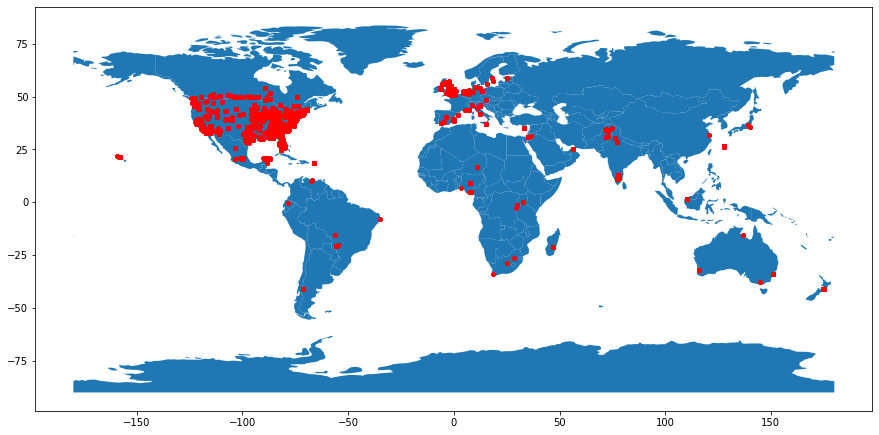

In [ ]:
df = pd.DataFrame(keep_tuples, columns = ['Tweet id','Latitude','Longitude'])
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);